In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Activation Functions</h1>

10.1 First plot the sigmoid (with $a=1,2, 3$), tanh and ReLU functions using Python
respectively. Then show that $tanh(s) = 2sigmoid(s|2)−1$.

In [17]:
def sigmoid(s, a=1):
    """Sigmoid function with scaling parameter a"""
    return 1 / (1 + np.exp(-a * s))

def relu(x, alpha=0.01, a=1):
    """Leaky ReLU function with leak parameter alpha and scaling parameter a"""
    return np.where(x > 0, a * x, alpha * a * x)

def tanh_scaled(x, a=1):
    """Hyperbolic tangent function with scaling parameter a"""
    return np.tanh(a * x)

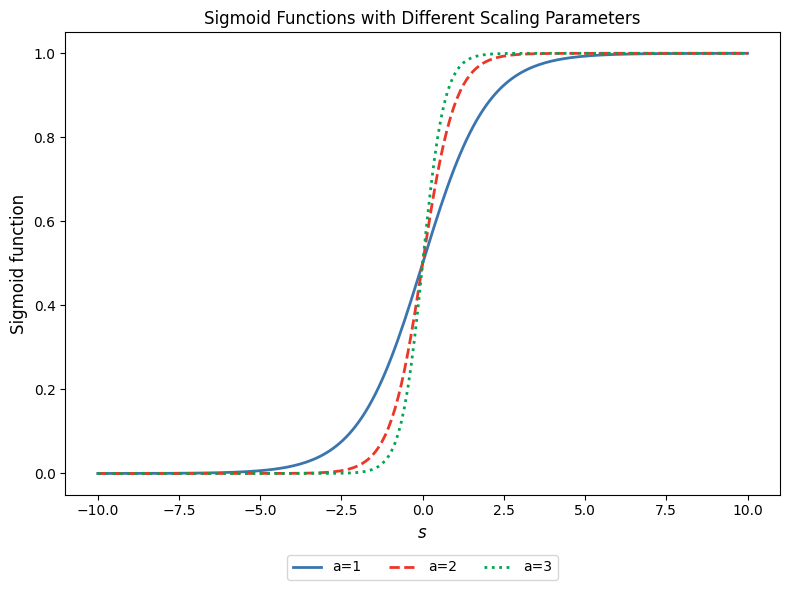

In [34]:
s = np.linspace(-10, 10, 200)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot sigmoid functions with different scaling parameters
ax.plot(s, sigmoid(s, a=1), linestyle='-', label='a=1', linewidth=2, color='#3B75AF')
ax.plot(s, sigmoid(s, a=2), linestyle='--', label='a=2', linewidth=2, color='#EA3728')
ax.plot(s, sigmoid(s, a=3), linestyle=':', label='a=3', linewidth=2, color='#00A651')

# Customize the plot
ax.set_xlabel('$s$', fontsize=12)
ax.set_ylabel('Sigmoid function', fontsize=12)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=3)
# ax.grid(True, alpha=0.3)
ax.set_title('Sigmoid Functions with Different Scaling Parameters')

plt.savefig("sigmoid_function.png", transparent=True, bbox_inches="tight")
plt.tight_layout()
plt.show()

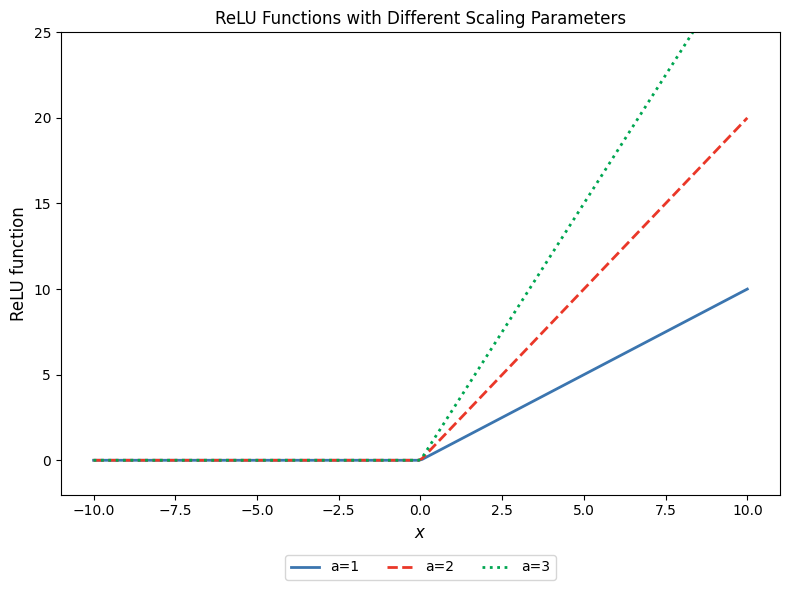

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x, a=1):
    """ReLU function with scaling parameter a"""
    return np.maximum(0, a * x)

def tanh_scaled(x, a=1):
    """Hyperbolic tangent function with scaling parameter a"""
    return np.tanh(a * x)

# Generate input values
x = np.linspace(-10, 10, 200)

# ReLU Plot
fig1, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(x, relu(x, a=1), linestyle='-', label='a=1', linewidth=2, color='#3B75AF')
ax1.plot(x, relu(x, a=2), linestyle='--', label='a=2', linewidth=2, color='#EA3728')
ax1.plot(x, relu(x, a=3), linestyle=':', label='a=3', linewidth=2, color='#00A651')

ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('ReLU function', fontsize=12)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=3)
# ax1.grid(True, alpha=0.3)
ax1.set_title('ReLU Functions with Different Scaling Parameters')
ax1.set_ylim(-2, 25)

plt.savefig("relu_function.png", transparent=True, bbox_inches="tight")
plt.tight_layout()
plt.show()

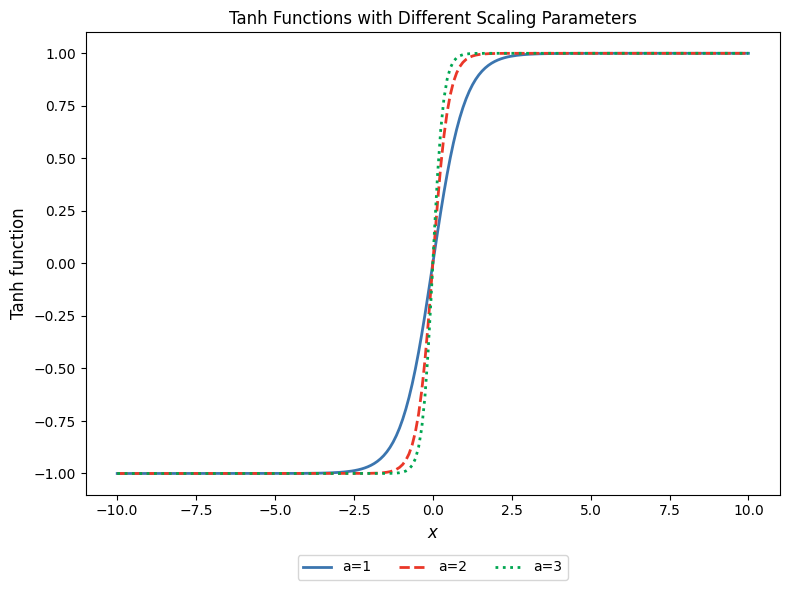

In [36]:
# Tanh Plot
fig2, ax2 = plt.subplots(figsize=(8, 6))

ax2.plot(x, tanh_scaled(x, a=1), linestyle='-', label='a=1', linewidth=2, color='#3B75AF')
ax2.plot(x, tanh_scaled(x, a=2), linestyle='--', label='a=2', linewidth=2, color='#EA3728')
ax2.plot(x, tanh_scaled(x, a=3), linestyle=':', label='a=3', linewidth=2, color='#00A651')

ax2.set_xlabel('$x$', fontsize=12)
ax2.set_ylabel('Tanh function', fontsize=12)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=3)
# ax2.grid(True, alpha=0.3)
ax2.set_title('Tanh Functions with Different Scaling Parameters')

plt.savefig("tanh_function.png", transparent=True, bbox_inches="tight")
plt.tight_layout()
plt.show()

<h1>ML vs. Classical Methods</h1>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import MSTL

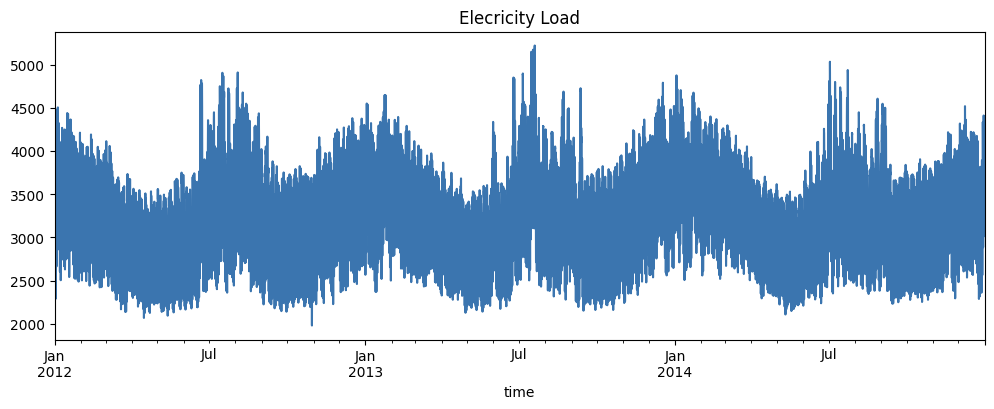

In [15]:
df = pd.read_csv('elec-temp.csv', parse_dates=['time'], index_col='time')
df['load'].plot(figsize=(12, 4), title='Elecricity Load', color="#3B75AF")
plt.savefig("load_series.png", transparent=True, bbox_inches="tight")
plt.show()

In [20]:
def mstl_decomposition(csv_file, target_column='load'):
    """
    Simple MSTL decomposition for time series data
    """
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Convert time column to datetime
    df['time'] = pd.to_datetime(df['time'])
    
    # Set time as index
    df.set_index('time', inplace=True)
    
    # Ensure regular frequency (hourly)
    df = df.asfreq('H')
    
    print(f"Data shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Date range: {df.index.min()} to {df.index.max()}")
    
    # Get the target series
    series = df[target_column].dropna()
    
    # Perform MSTL decomposition
    # periods=[24, 168] for daily and weekly seasonality
    mstl = MSTL(series, periods=[24, 168])
    result = mstl.fit()
    
    # Plot the decomposition
    fig, axes = plt.subplots(5, 1, figsize=(14, 12))
    
    # Original series
    axes[0].plot(series.index, series.values)
    axes[0].set_title(f'Original {target_column.title()} Series')
    axes[0].set_ylabel(target_column.title())
    axes[0].set_xticks([])
    
    # Trend
    axes[1].plot(result.trend.index, result.trend.values, color='#3B75AF')
    axes[1].set_title('Trend Component')
    axes[1].set_ylabel('Trend')
    axes[1].set_xticks([])
    
    # Daily seasonal (24-hour)
    axes[2].plot(result.seasonal.iloc[:, 0].index, result.seasonal.iloc[:, 0].values, color='#EA3728')
    axes[2].set_title('Daily Seasonal Component (24-hour cycle)')
    axes[2].set_ylabel('Daily Seasonal')
    axes[2].set_xticks([])
    
    # Weekly seasonal (168-hour)
    axes[3].plot(result.seasonal.iloc[:, 1].index, result.seasonal.iloc[:, 1].values, color='#EA3728')
    axes[3].set_title('Weekly Seasonal Component (168-hour cycle)')
    axes[3].set_ylabel('Weekly Seasonal')
    axes[3].set_xticks([])
    
    # Residuals
    axes[4].plot(result.resid.index, result.resid.values, color='#EF8636')
    axes[4].set_title('Residuals')
    axes[4].set_ylabel('Residuals')
    axes[4].set_xlabel('Time')

    plt.savefig("load_mstl_decomposition.png", transparent=True, bbox_inches="tight")
    plt.tight_layout()
    plt.show()
    
    return result, df

MSTL Decomposition for Load Data
Data shape: (26304, 2)
Columns: ['load', 'temp']
Date range: 2012-01-01 00:00:00 to 2014-12-31 23:00:00


/var/folders/ct/gwsc922d4975_35ryh860bc40000gn/T/ipykernel_10978/3009553767.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq('H')


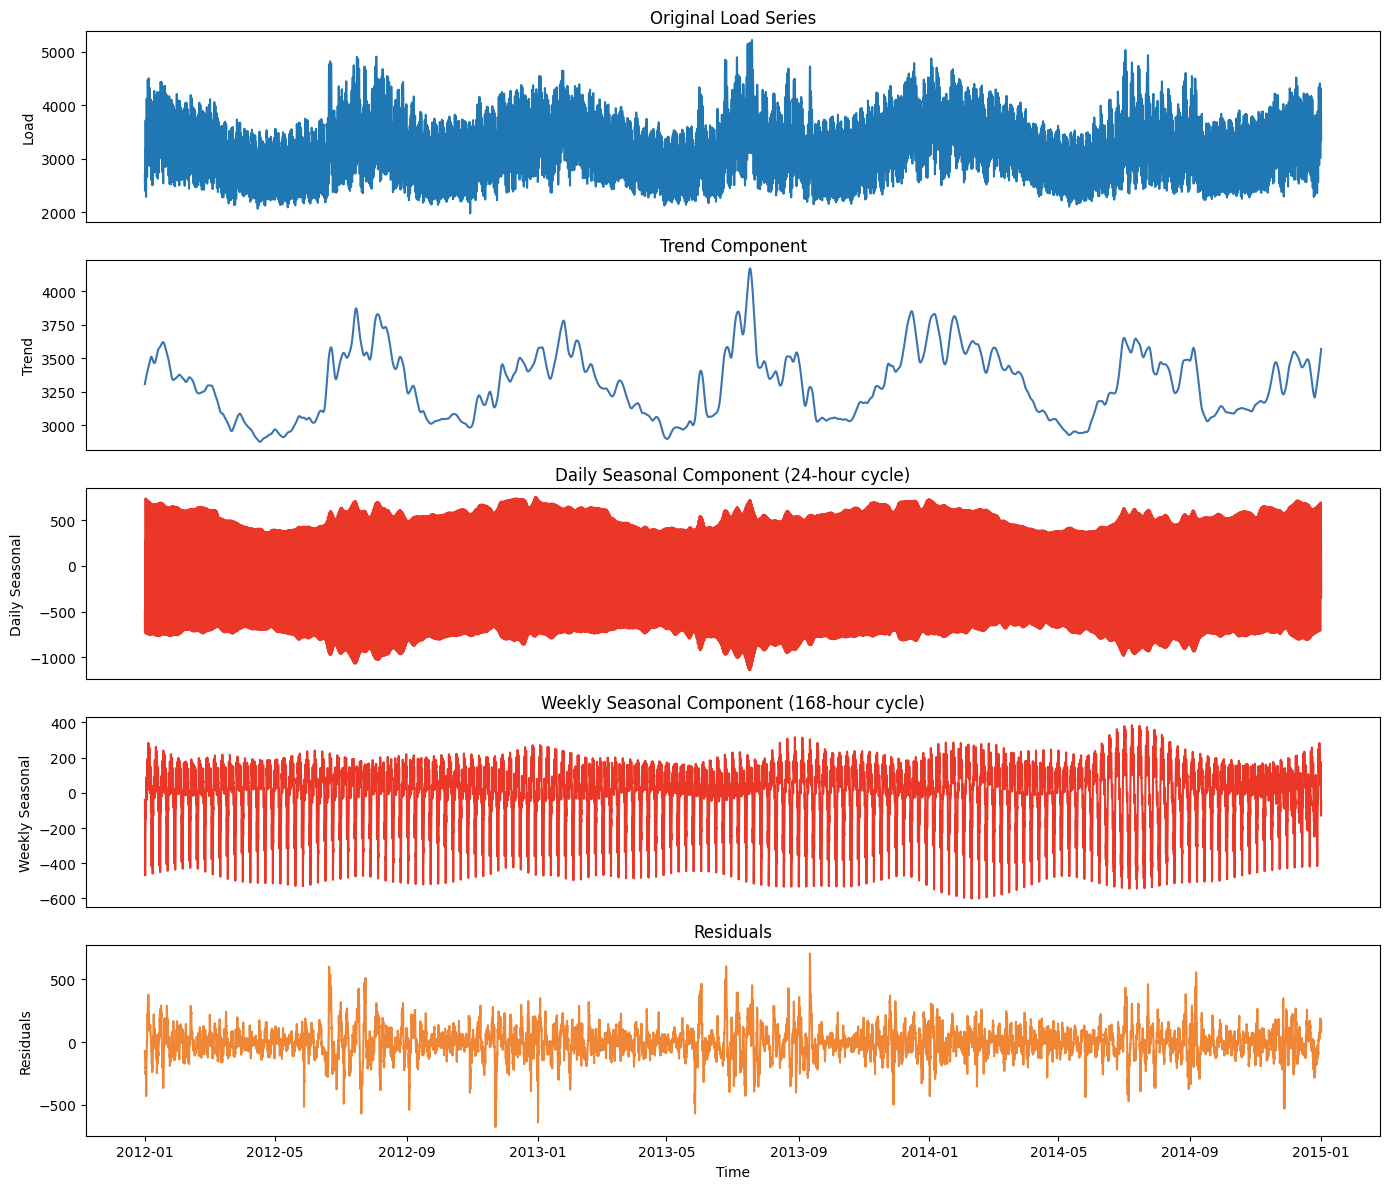

In [21]:
# Decompose load data
print("MSTL Decomposition for Load Data")
print("=" * 40)
load_result, df = mstl_decomposition('elec-temp.csv', target_column='load')

<h1>ML</h1>

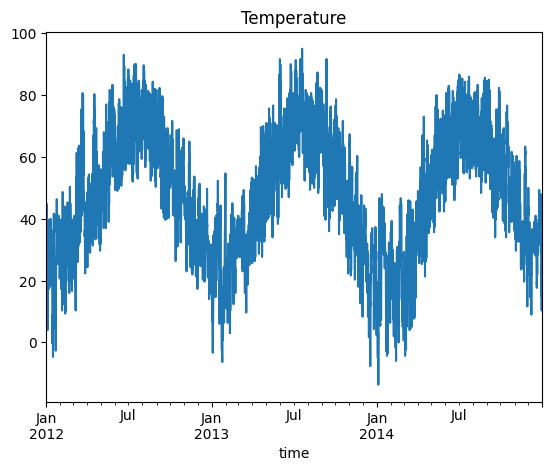

Epoch 1/40


/Users/raulbag/Documents/personal/projects/llamma/quantinar-search-exporter/.venv/ATSSB_ML/lib/python3.12/site-packages/PythonTsa/TsTensor.py:72: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["t+" + str(t)] = df[self.target].shift(t * -1, freq=freq)
/Users/raulbag/Documents/personal/projects/llamma/quantinar-search-exporter/.venv/ATSSB_ML/lib/python3.12/site-packages/PythonTsa/TsTensor.py:92: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[shifted_col] = df[col].shift(t * -1, freq=freq)
/Users/raulbag/Documents/personal/projects/llamma/quantinar-search-exporter/.venv/ATSSB_ML/lib/python3.12/site-packages/PythonTsa/TsTensor.py:92: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[shifted_col] = df[col].shift(t * -1, freq=freq)
/Users/raulbag/Documents/personal/projects/llamma/quantinar-search-exporter/.venv/ATSSB_ML/lib/pyth

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - loss: 0.0443 - val_loss: 0.0049
Epoch 2/40
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 3/40
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/40
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - loss: 0.0012 - val_loss: 9.4575e-04
Epoch 5/40
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - loss: 9.5393e-04 - val_loss: 7.5345e-04
Epoch 6/40
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - loss: 8.0017e-04 - val_loss: 6.5168e-04
Epoch 7/40
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - loss: 7.1646e-04 - val_loss: 5.9579e-04
Epoch 8/40
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - loss: 6.5235e-04 - val_loss: 5.4999e-04
Epoch 9/40
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - loss: 5.9476e-04 - val_loss: 4.9731e-04
Epoch 10/40
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - loss: 5.4239e-04 - val_loss: 5.1808e-04
Epoch 11/40
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - loss: 5.3958e-04 - va

/Users/raulbag/Documents/personal/projects/llamma/quantinar-search-exporter/.venv/ATSSB_ML/lib/python3.12/site-packages/PythonTsa/TsTensor.py:72: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["t+" + str(t)] = df[self.target].shift(t * -1, freq=freq)
/Users/raulbag/Documents/personal/projects/llamma/quantinar-search-exporter/.venv/ATSSB_ML/lib/python3.12/site-packages/PythonTsa/TsTensor.py:92: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[shifted_col] = df[col].shift(t * -1, freq=freq)
/Users/raulbag/Documents/personal/projects/llamma/quantinar-search-exporter/.venv/ATSSB_ML/lib/python3.12/site-packages/PythonTsa/TsTensor.py:92: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[shifted_col] = df[col].shift(t * -1, freq=freq)
/Users/raulbag/Documents/personal/projects/llamma/quantinar-search-exporter/.venv/ATSSB_ML/lib/pyth

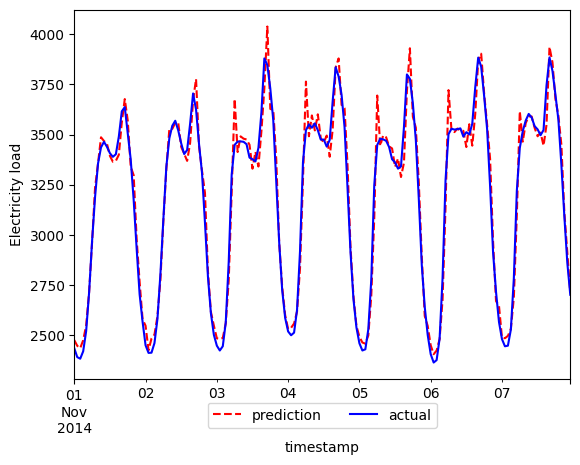

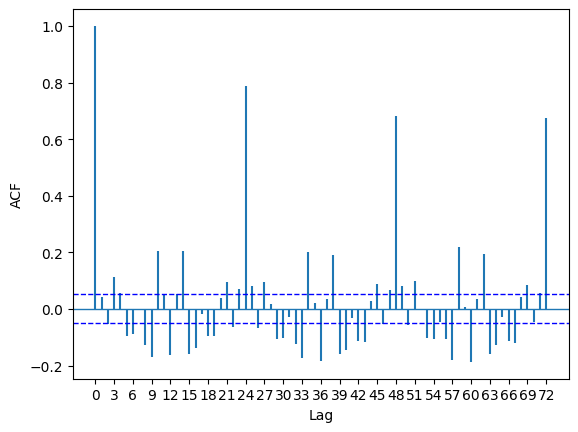

In [10]:
import datetime as dt

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

from PythonTsa.datadir import getdtapath
from PythonTsa.TsTensor import tstensor, create_evaluation_df
from PythonTsa.plot_acf_pacf import acf_pacf_fig

# ------------------------------------------------------------------
# 1. Load data
# ------------------------------------------------------------------
dtapath = getdtapath()
tsdta = pd.read_csv(dtapath + "elec-temp.csv")

tsdta["time"] = pd.to_datetime(tsdta["time"])
tsdta.set_index("time", inplace=True)
tsdta["temp"].plot(title="Temperature")
plt.savefig("temperature.png", transparent=True, bbox_inches="tight")
plt.show()

# ------------------------------------------------------------------
# 2. Train / validation / test split
# ------------------------------------------------------------------
valid_stdta = "2014-09-01 00:00:00"
test_stdta  = "2014-11-01 00:00:00"
T           = 6       # input-window length (hours)
HORIZON     = 1       # forecast horizon (hours)

train      = tsdta.loc[:valid_stdta].copy()
valid_part = tsdta.loc[valid_stdta:test_stdta].copy()
test_part  = tsdta.loc[test_stdta:].copy()

# ------------------------------------------------------------------
# 3. Scaling
# ------------------------------------------------------------------
y_scaler = MinMaxScaler()
y_scaler.fit(train[["load"]])

X_scaler = MinMaxScaler()
train[["load", "temp"]] = X_scaler.fit_transform(train[["load", "temp"]])

# ------------------------------------------------------------------
# 4. Tensor preparation
# ------------------------------------------------------------------
tensor = {"X": (range(-T + 1, 1), ["load", "temp"])}

ts_train_inp = tstensor(
    dataset=train,
    target="load",
    H=HORIZON,
    tensor_structure=tensor,
    freq="H",
    drop_incomplete=True,
)

# ------------------------------------------------------------------
# 5. Validation-set tensors
# ------------------------------------------------------------------
back_ts_data = dt.datetime.strptime(valid_stdta, "%Y-%m-%d %H:%M:%S") - dt.timedelta(hours=T - 1)
tsdta_valid  = tsdta.loc[back_ts_data:test_stdta, ["load", "temp"]].copy()
tsdta_valid[["load", "temp"]] = X_scaler.transform(tsdta_valid)

valid_inputs = tstensor(tsdta_valid, "load", HORIZON, tensor)

# ------------------------------------------------------------------
# 6. GRU model
# ------------------------------------------------------------------
LATENT_DIM = 5
BATCH_SIZE = 32
EPOCHS     = 40

model = Sequential(
    [
        GRU(LATENT_DIM, input_shape=(T, 2)),
        Dense(HORIZON),
    ]
)
model.compile(optimizer="adam", loss="mse")

earlystop = EarlyStopping(monitor="val_loss", patience=5, min_delta=0)

model_history = model.fit(
    ts_train_inp["X"],
    ts_train_inp["target"],
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(valid_inputs["X"], valid_inputs["target"]),
    callbacks=[earlystop],
    verbose=1,
)

# ------------------------------------------------------------------
# 7. Test-set tensors & prediction
# ------------------------------------------------------------------
back_tsdta   = dt.datetime.strptime(test_stdta, "%Y-%m-%d %H:%M:%S") - dt.timedelta(hours=T - 1)
tsdta_test   = tsdta.loc[back_tsdta:, ["load", "temp"]].copy()
tsdta_test[["load", "temp"]] = X_scaler.transform(tsdta_test)

tsdta_test_inputs = tstensor(tsdta_test, "load", HORIZON, tensor)
ts_predictions     = model.predict(tsdta_test_inputs["X"])

# ------------------------------------------------------------------
# 8. Evaluation
# ------------------------------------------------------------------
ev_tsdta = create_evaluation_df(ts_predictions, tsdta_test_inputs, HORIZON, y_scaler)

print(ev_tsdta.head())
print("MAPE:", mean_absolute_percentage_error(ev_tsdta["actual"], ev_tsdta["prediction"]))

# Plot prediction vs actual for an early slice
ev_tsdta[ev_tsdta.timestamp < "2014-11-08"].plot(
    x="timestamp",
    y=["prediction", "actual"],
    style=["--r", "-b"],
)
plt.ylabel("Electricity load")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.savefig("gru_model.png", transparent=True, bbox_inches="tight")
plt.show()

# Residual diagnostics
resid = ev_tsdta["actual"] - ev_tsdta["prediction"]
acf_pacf_fig(resid, lag=72)
plt.savefig("acf_pacf.png", transparent=True, bbox_inches="tight")
plt.show()
